In [1]:
import pandas as pd

## Excel file

In [2]:
# Open the Excel file with diagnose
df_data = pd.read_excel("../data/Mole_Data/CLIN_DIA.xlsx")

In [3]:
df_data.head(10)

,klin. Diagn.,id,nr,Histo performed,Diagnose red.,kat.Diagnose
0,Compound Nävus,d1,1.0,0.0,Compound Nevus,1
1,Compound Nävus,d2,2.0,0.0,Compound Nevus,1
2,Dysplastischer Nävus,d3,3.0,0.0,Compound Nevus,1
3,Compound Nävus,d4,4.0,0.0,Compound Nevus,1
4,Dermaler Nävus,d5,5.0,0.0,Compound Nevus,1
5,Dysplastischer Nävus,d6,6.0,0.0,Compound Nevus,1
6,Dysplastischer Nävus,d7,7.0,0.0,Compound Nevus,1
7,Compound Nävus,d8,8.0,0.0,Compound Nevus,1
8,Dysplastischer Nävus,d9,9.0,0.0,Compound Nevus,1
9,Compound Nävus,d10,10.0,0.0,Compound Nevus,1


In [4]:
df_data.tail(10)

,klin. Diagn.,id,nr,Histo performed,Diagnose red.,kat.Diagnose
5490,NaN,NaN,NaN,NaN,NaN,NaN
5491,NaN,NaN,NaN,NaN,NaN,NaN
5492,NaN,NaN,NaN,NaN,NaN,NaN
5493,NaN,NaN,NaN,NaN,NaN,NaN
5494,NaN,NaN,NaN,NaN,NaN,NaN
5495,NaN,NaN,NaN,NaN,NaN,NaN
5496,NaN,NaN,NaN,NaN,NaN,NaN
5497,NaN,NaN,NaN,NaN,NaN,NaN
5498,NaN,NaN,NaN,NaN,NaN,NaN
5499,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   klin. Diagn.     3000 non-null   object 
 1   id               3000 non-null   object 
 2   nr               3000 non-null   float64
 3   Histo performed  3000 non-null   float64
 4   Diagnose red.    3000 non-null   object 
 5   kat.Diagnose     3000 non-null   object 
dtypes: float64(2), object(4)
memory usage: 257.9+ KB


In [6]:
# Check null values
df_data.isna().sum()

klin. Diagn.       2500
id                 2500
nr                 2500
Histo performed    2500
Diagnose red.      2500
kat.Diagnose       2500
dtype: int64

In [7]:
# Delete empty rows
filter_empty_id = df_data.id.isna()
df_data = df_data.drop(df_data[filter_empty_id].index)
if df_data.isna().values.any():
    print("There is still some NaN")
else:
    print("Good job guy! All NaN are cleaned!")

Good job guy! All NaN are cleaned!


In [8]:
# Check diagnose class
df_data["kat.Diagnose"].value_counts()

1    2300
2     585
0      62
3      52
?       1
Name: kat.Diagnose, dtype: int64

In [9]:
# Drop "?" from 
filter_bad_diagnose = df_data["kat.Diagnose"] == "?"
df_data = df_data.drop(df_data[filter_bad_diagnose].index)
df_data["kat.Diagnose"].value_counts()

1    2300
2     585
0      62
3      52
Name: kat.Diagnose, dtype: int64

In [10]:
# Convert ID to UPPER
df_data["id"] = df_data["id"].apply(lambda x: x.upper())

In [11]:
df_data.sample(10)

,klin. Diagn.,id,nr,Histo performed,Diagnose red.,kat.Diagnose
2353,Compound Nevus,F354,2354.0,0.0,Compound Nevus,1
2956,Compound Nevus,F957,2957.0,0.0,Compound Nevus,1
749,Compound Nevus,D750,750.0,0.0,Compound Nevus,1
2134,Compound Nevus,F135,2135.0,0.0,Compound Nevus,1
878,Compound Nevus,D879,879.0,0.0,Compound Nevus,1
238,Junctional Nevus,D239,239.0,0.0,Junctional Nevus,1
2694,Blue Nevus,F695,2695.0,0.0,Blue Nevus,1
2327,Compound Nevus,F328,2328.0,0.0,Compound Nevus,1
1054,Compound Nevus,E55,1055.0,0.0,Compound Nevus,1
1990,Compound Nevus,E991,1991.0,0.0,Compound Nevus,1


## Image files

In [12]:
import numpy as np

import os


In [13]:
def load_bmp_dataset(path):
    filelist = []
    for root, _, files in os.walk(path):
        filelist = filelist + [os.path.join(root, x) for x in files if x.upper().endswith(('.BMP'))] 
    
    df = pd.DataFrame(filelist, columns=["file_path"])
    df["id"] = df["file_path"].apply(lambda x: (x.split('/')[-1]).replace(".BMP", ""))
    
    return df

In [14]:
image_base_dir = "../data/Mole_Data/"

df_images = load_bmp_dataset(image_base_dir)
df_images.shape

(2900, 2)

In [15]:
df_images.sample(10)

,file_path,id
446,../data/Mole_Data/SET_D/D812.BMP,D812
1698,../data/Mole_Data/SET_E/E382.BMP,E382
1041,../data/Mole_Data/SET_E/E558.BMP,E558
319,../data/Mole_Data/SET_D/D619.BMP,D619
534,../data/Mole_Data/SET_D/D52.BMP,D52
2308,../data/Mole_Data/SET_F/F779.BMP,F779
535,../data/Mole_Data/SET_D/D217.BMP,D217
2162,../data/Mole_Data/SET_F/F268.BMP,F268
989,../data/Mole_Data/SET_E/E58.BMP,E58
812,../data/Mole_Data/SET_D/D856.BMP,D856


## Merge data

In [16]:
df_global = pd.merge(df_data, df_images, on='id', how='inner')

In [17]:
df_global.shape

(2900, 7)

In [18]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2900 entries, 0 to 2899
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   klin. Diagn.     2900 non-null   object 
 1   id               2900 non-null   object 
 2   nr               2900 non-null   float64
 3   Histo performed  2900 non-null   float64
 4   Diagnose red.    2900 non-null   object 
 5   kat.Diagnose     2900 non-null   object 
 6   file_path        2900 non-null   object 
dtypes: float64(2), object(5)
memory usage: 181.2+ KB


In [19]:
df_global.sample(10)

,klin. Diagn.,id,nr,Histo performed,Diagnose red.,kat.Diagnose,file_path
2114,Atypical Nevus,F186,2186.0,1.0,Junctional Nevus,1,../data/Mole_Data/SET_F/F186.BMP
136,Compound Nevus,D146,146.0,0.0,Compound Nevus,1,../data/Mole_Data/SET_D/D146.BMP
47,Compound Nävus,D49,49.0,0.0,Compound Nevus,1,../data/Mole_Data/SET_D/D49.BMP
1016,Atypical Nevus,E39,1039.0,0.0,Dysplastic Nevus,2,../data/Mole_Data/SET_E/E39.BMP
1472,Dermal Nevus,E522,1522.0,1.0,Dermal Nevus,1,../data/Mole_Data/SET_E/E522.BMP
2702,Compound Nevus,F788,2788.0,0.0,Compound Nevus,1,../data/Mole_Data/SET_F/F788.BMP
1226,Compound Nevus,E260,1260.0,0.0,Compound Nevus,1,../data/Mole_Data/SET_E/E260.BMP
1254,Atypical Nevus,E290,1290.0,1.0,Dysplastic Nevus,2,../data/Mole_Data/SET_E/E290.BMP
1301,Compound Nevus,E339,1339.0,0.0,Compound Nevus,1,../data/Mole_Data/SET_E/E339.BMP
2020,Dermal Nevus,F89,2089.0,0.0,Dermal Nevus,1,../data/Mole_Data/SET_F/F89.BMP


## Final data cleaning

In [20]:
df_global = df_global[["id", "file_path", "kat.Diagnose"]]
df_global["maligne"] = df_global["kat.Diagnose"]>1
df_global.sample(25)

,id,file_path,kat.Diagnose,maligne
1304,E343,../data/Mole_Data/SET_E/E343.BMP,1,False
1004,E26,../data/Mole_Data/SET_E/E26.BMP,1,False
917,D938,../data/Mole_Data/SET_D/D938.BMP,1,False
1981,F49,../data/Mole_Data/SET_F/F49.BMP,1,False
1380,E428,../data/Mole_Data/SET_E/E428.BMP,1,False
1571,E622,../data/Mole_Data/SET_E/E622.BMP,3,True
1837,E901,../data/Mole_Data/SET_E/E901.BMP,1,False
1763,E821,../data/Mole_Data/SET_E/E821.BMP,1,False
264,D280,../data/Mole_Data/SET_D/D280.BMP,1,False
2457,F531,../data/Mole_Data/SET_F/F531.BMP,1,False


In [21]:
df_global["kat.Diagnose"].value_counts()

1    2271
2     579
3      50
Name: kat.Diagnose, dtype: int64

## Save the final dataset

In [22]:
df_global.to_csv("../data/preprocessed/df_mole_merged.csv", index=False)

<AxesSubplot:>

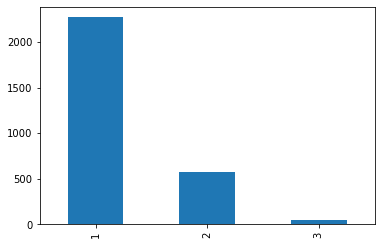

In [23]:
pd.value_counts(df_global["kat.Diagnose"]).plot.bar()